# K-Means Clustering
1. Build a machine learning model to create group of mall customers based on their annual income and 
spending score for a given dataset


In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Unsuperwised Learning-Clustering library
from sklearn.cluster import KMeans

import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import importlib.util

In [3]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week 12/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [4]:
# load dataset
dataset_original = pd.read_csv ("Mall_Customers.csv")
dataset = dataset_original
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 200 rows and 5 Columns


In [6]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# descibe the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# check for duplicate values
dataset.duplicated().sum()

0

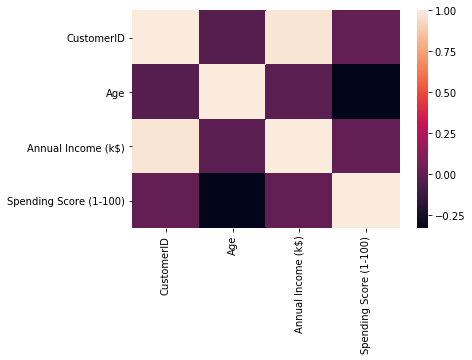

In [10]:
#Display heatmap to show correlation between diff variables
corr = dataset.corr()
sb.heatmap(corr)

In [7]:
# seperate fetures and label
# features -> Annual Income (k$) and Spending Score (1-100)
x_train = dataset.iloc[:,[3,4]].values
print("x_train :",x_train.shape)

x_train : (200, 2)


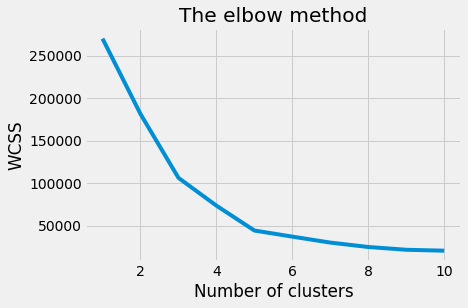

In [8]:
# use elbow method to find the optimal numbers of clusters
def cluster_numbers(x_train):
    # intialize empty list for wscc(Within cluster some of Squares)
    wcss = []
    # for loop for taking multiple clusters
    for clusters in range(1, 11):
        k_means = KMeans(n_clusters= clusters, init= 'k-means++', max_iter=300, n_init= 10, random_state=0)
        k_means.fit(x_train)
        wcss.append(k_means.inertia_)
   # to display graph properly eith grids
    plt.style.use('fivethirtyeight')
    plt.plot(range(1,11),wcss)
#     sb.scatterplot(range(1,11),wcss)
    plt.title("The elbow method")
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
#     print(wcss)
    
# call method 
cluster_numbers(x_train)

# K_Means_clustering Model

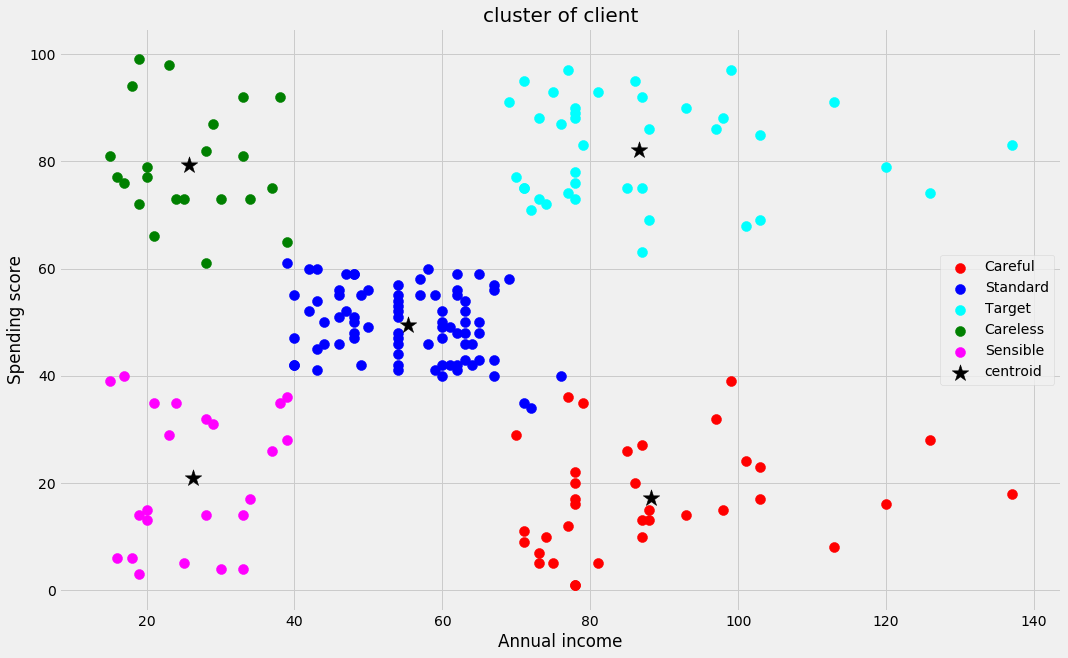

In [24]:
class K_Means_clustering():
    #apply K- means to mall dataset
    def create_module(self,x):
        k_means_obj =KMeans(n_clusters= 5, init= 'k-means++', max_iter=300, n_init= 10, random_state=0)
        return k_means_obj
    
def main():
    #class obj created
    obj  = K_Means_clustering()

    # create K_Means_clustering module
    k_means_obj = obj.create_module(x_train)
#     print("\n Module created")

    # predict y with its class
    y_kmeans = obj_util.prediction(x_train, k_means_obj)
#     print("\n y_kmean:\n",y_kmeans)
    
    # visualise customers at their class
    obj_util.visualization_for_clusters(x_train, y_kmeans, k_means_obj)
    
    # We cannot caculate accuracy here bcoz we dont have y_actual data
    
#     # Calculate accuracy  
#     adi, mib = obj_util.accuracy(y_train,y_kmeans)
    
#     print('\nPerformance by adjusted rand index:' , adi)
#     print('\nPerformance by Mutual information based score:'.mib)
    
if __name__ == '__main__':
    main()
